In [13]:
import torch
from PIL import Image
from tinychart.model.builder import load_pretrained_model
from tinychart.mm_utils import get_model_name_from_path
from tinychart.eval.run_tiny_chart import inference_model
from tinychart.eval.eval_metric import parse_model_output, evaluate_cmds

In [14]:
def show_image(img_path):
    img = Image.open(img_path).convert('RGB')
    img.show()

In [15]:
# Build the model
model_path = "mPLUG/TinyChart-3B-768"

tokenizer, model, image_processor, context_len = load_pretrained_model(
    model_path, 
    model_base=None,
    model_name=get_model_name_from_path(model_path),
    device="cuda"
)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at checkpoints/TinyChart-3B-768 were not used when initializing TinyChartPhiForCausalLM: ['model.vision_tower.vision_tower.vision_model.embeddings.patch_embedding.bias', 'model.vision_tower.vision_tower.vision_model.embeddings.patch_embedding.weight', 'model.vision_tower.vision_tower.vision_model.embeddings.position_embedding.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm1.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm1.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm2.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm2.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.mlp.fc1.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.mlp.fc1.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.mlp.fc2.bias', 'model.vision_tower.vision_tower.vision_model.encoder.laye

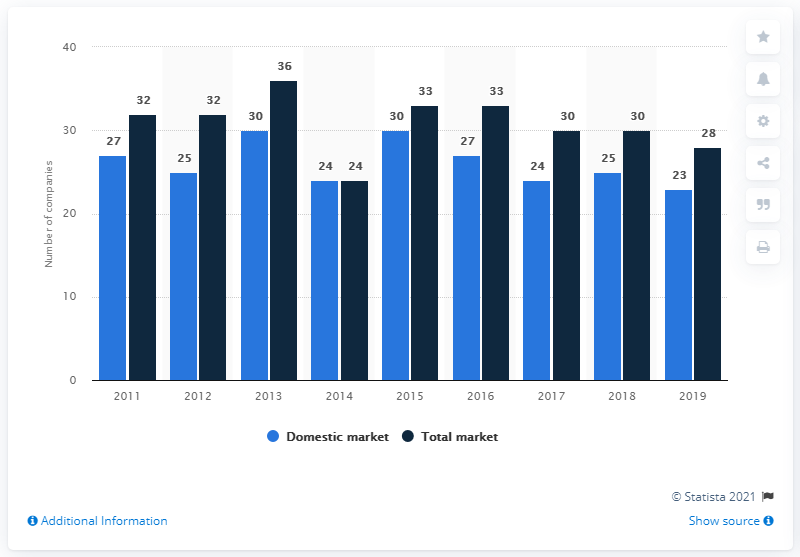

In [16]:
img_path = "images/market.png"
show_image(img_path)

# To use program-of-thoughts, append `Answer with detailed steps.` to the prompt
text = "What is the highest number of companies in the domestic market? Answer with detailed steps."

In [17]:
response = inference_model([img_path], text, model, tokenizer, image_processor, context_len, conv_mode="phi", max_new_tokens=1024)

/nas-alinlp/zhangliang/conda_envs/tinyllava/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:392: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


<comment># Get the values of 'Domestic market' for each year, set to Y</comment>
<step>Y=[23, 25, 24, 27, 30, 24, 30, 25, 27]</step>
<comment># Get the maximum value in Y, set to Answer</comment>
<step>Answer=np.max(Y)</step>


In [18]:
# Run this code to evaluate the generated python code
evaluate_cmds(parse_model_output(response))

30